#  1. Installing Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [3]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\vedan\AppData\Local\Temp\pip-install-p9yjhlo8\tensorflow-gpu_007388791f4445369ece1154aad00082\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-

In [4]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2022.12.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
executing                    0.8.3
flatbuffers                  23.3.3
fonttools                    4.39.3
gast                         0.4.0
google-auth                  2.17.3
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.54.0
h5py                         3.8.0
idna                         3.4
importlib-metadata           6.0.0
importlib-resources          5.12.0
ipykernel                    6.19.2
ipyth

In [5]:
import cv2
import imghdr

ModuleNotFoundError: No module named 'cv2'

In [6]:
pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


# Removing any void images

In [16]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
data_dir = 'Data' 


In [10]:
os.listdir(data_dir)

['Non-referenceable', 'Referenceable']

image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
image_path = os.path.join(data_dir,'Non-referenceable', 'IM4626EY.jpg')

In [15]:
img = cv2.imread(image_path)
type(img)

numpy.ndarray

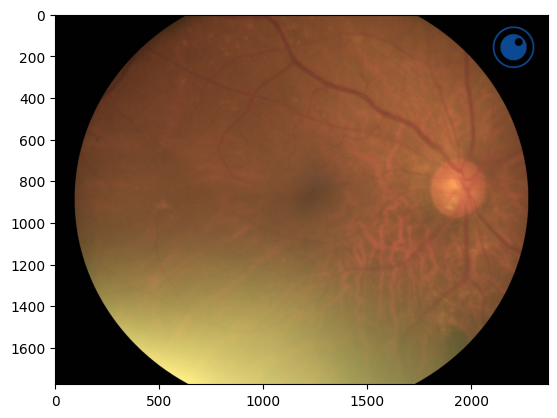

In [19]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [20]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Load data

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 3971 files belonging to 2 classes.


In [24]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next 

['Non-referenceable', 'Referenceable']

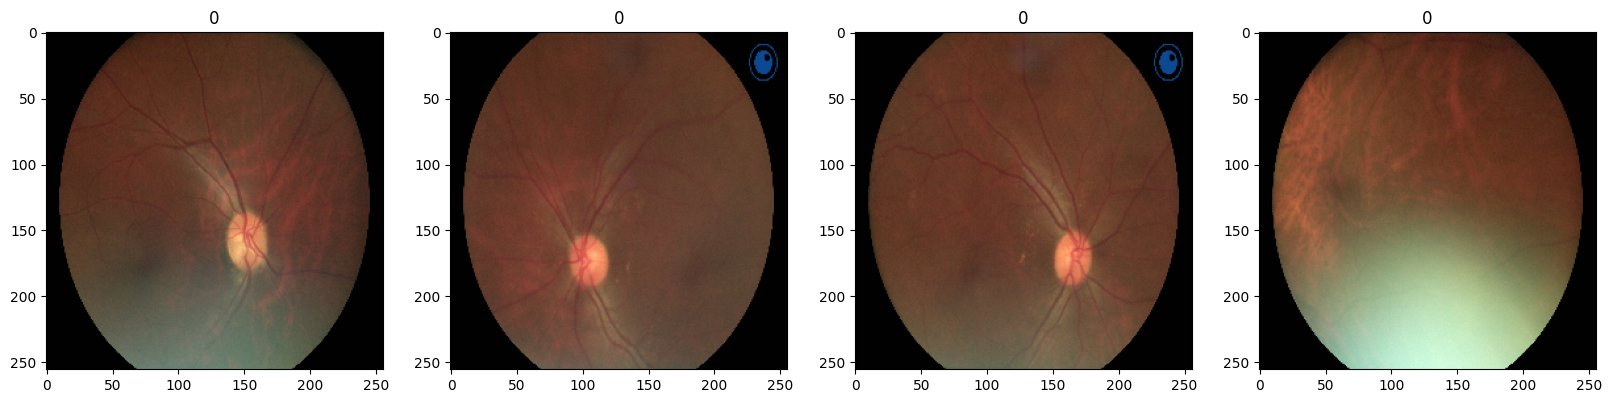

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
class_names=data.class_names

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


class_names
# 0--> 'Non-referenceable'
# 1--> 'Referenceable

In [58]:
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Preprocessing

In [60]:
#Scale Data
data = data.map(lambda x,y: (x/255, y))


In [65]:
scaled_it=data.as_numpy_iterator().next()

In [69]:
scaled_it

(array([[[[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         ...,
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392

In [70]:
len(data)

125

In [112]:
train_size = int(len(data)*.64)
val_size = int(len(data)*.16)
test_size = int(len(data)*.2)

In [113]:
train_size+test_size

105

In [114]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [115]:
len(train)


80

In [117]:
len(val)

20

# MODEL TRAINING

## 1.1 DLL MODEL

In [77]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [79]:
model=Sequential()

In [80]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [81]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [103]:
logdir='logs'

In [106]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [119]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
80/80 [==============================] - 86s 1s/step - loss: 0.2269 - accuracy: 0.9391 - val_loss: 0.2212 - val_accuracy: 0.9391
Epoch 2/20
80/80 [==============================] - 70s 833ms/step - loss: 0.2285 - accuracy: 0.9387 - val_loss: 0.1834 - val_accuracy: 0.9500
Epoch 3/20
80/80 [==============================] - 52s 622ms/step - loss: 0.2151 - accuracy: 0.9371 - val_loss: 0.1616 - val_accuracy: 0.9516
Epoch 4/20
80/80 [==============================] - 53s 633ms/step - loss: 0.2221 - accuracy: 0.9371 - val_loss: 0.1854 - val_accuracy: 0.9469
Epoch 5/20
80/80 [==============================] - 52s 632ms/step - loss: 0.2222 - accuracy: 0.9398 - val_loss: 0.2014 - val_accuracy: 0.9438
Epoch 6/20
80/80 [==============================] - 52s 631ms/step - loss: 0.2285 - accuracy: 0.9371 - val_loss: 0.2022 - val_accuracy: 0.9406
Epoch 7/20
80/80 [==============================] - 52s 627ms/step - loss: 0.2164 - accuracy: 0.9375 - val_loss: 0.1776 - val_accuracy: 0.9500
Ep

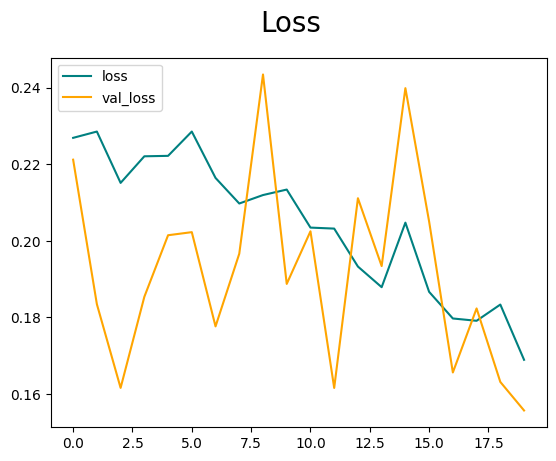

In [120]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

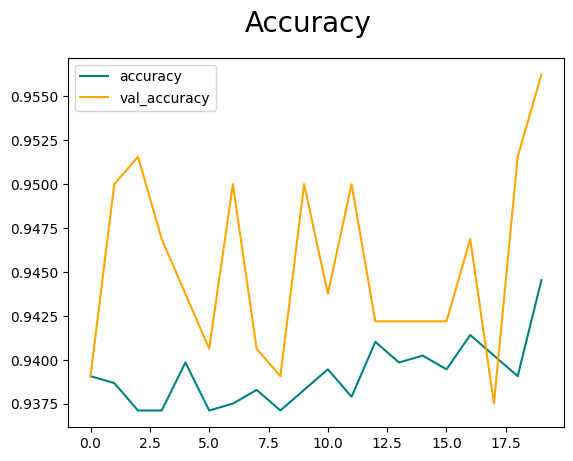

In [121]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [122]:
#Evaluation

In [123]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [124]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [125]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 469ms/step


In [126]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.2, shape=(), dtype=float32) tf.Tensor(0.02, shape=(), dtype=float32) tf.Tensor(0.9312581, shape=(), dtype=float32)


In [168]:
i_path = os.path.join(data_dir,'Referenceable', 'OD2203EY.jpg')

In [169]:
im1=cv2.imread(i_path)

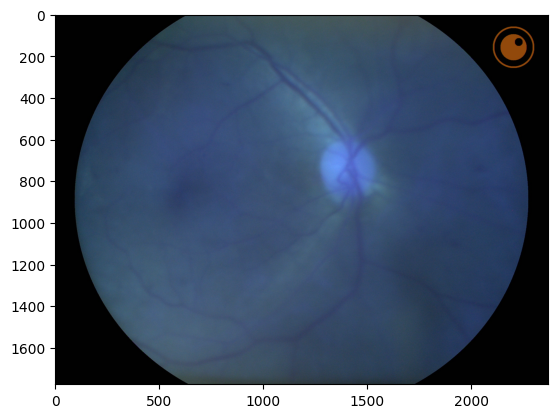

In [170]:
plt.imshow(im1)

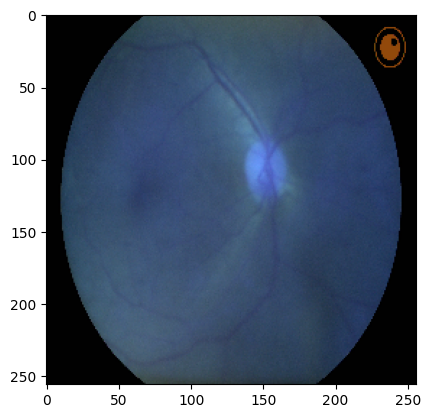

In [171]:
resize = tf.image.resize(im1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [172]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 24ms/step


In [173]:
yhat

array([[5.116259e-11]], dtype=float32)

In [174]:
if yhat > 0.5: 
    print(f'Predicted class is Referenceable')
else:
    print(f'Predicted class is Non-referenceable')

Predicted class is Non-referenceable
